In [6]:
from trajectories import *
from models import *
from plotting import *

Trajectory is (1, 2, 251)
Measured is (1, 2, 251)
Recovered has shape (1, 2, 251)
Plotting
Trajectory shape (251, 2)
Measured shape (251, 2)
Recovered shape (251, 2)


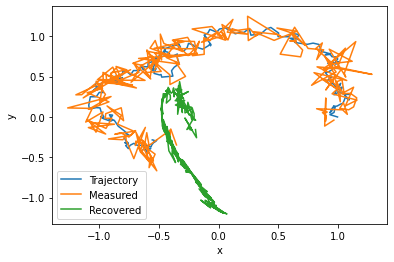

In [7]:
A, C, Q, R, S, x0, state_dim, obs_dim = so2_params()
rng = np.random.default_rng()

N = 1
T = 250

traj, meas = generate_traj(N, T, A, C, Q, R, S, x0, rng)

state_dim = A.shape[0]

print("Trajectory is", traj.shape)
print("Measured is", meas.shape)

model = GPTModel(n_dims_token=state_dim, n_positions=N, n_embd=128, n_layer=6, n_head=4)
model.train()

meas_reshaped = torch.tensor(meas, dtype=torch.float32).permute((2, 0, 1))
recv = model(meas_reshaped).permute((1, 2, 0)).detach().cpu().numpy()

print("Recovered has shape", recv.shape)
print('Plotting')
plot({"Trajectory":traj[0].T, "Measured":meas[0].T, "Recovered":recv[0].T})